<a href="https://colab.research.google.com/github/icrygleich/l-aminG/blob/main/MHWildsATKvsCritBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def my_func(input):
  output = input + 5
  return output

# Click this cell, then press shift + Enter to run it!!

In [ ]:
my_func(2)

7

In [ ]:
def apply_attack_boost(raw, bonus_raw, attack_boost_level):
  # this function applies the attack boost skill
  # raw: is the raw attack value of a weapon
  # bonus_raw: additional attack you get from armour skills etc.
  # attack_boost_level: level of attack boost

  if attack_boost_level == 1:
    total_raw = raw + 3
  elif attack_boost_level == 2:
    total_raw = raw + 5
  elif attack_boost_level == 3:
    total_raw = raw + 7
  elif attack_boost_level == 4:
    total_raw = raw*1.02 + 8
  elif attack_boost_level >= 5:
    total_raw = raw*1.04 + 9
  else:
    total_raw = raw
  total_raw = total_raw + bonus_raw
  return total_raw

In [ ]:
def apply_critical_boost(critical_boost_level):
  # this function applies the critical boost skill
  # critical_boost_level: level of the skill critical boost
  critical_modifier = 1.25 +(critical_boost_level*0.03)
  critical_modifier = min(critical_modifier, 1.4)
  critical_modifier = max(critical_modifier, 1.25)
  return critical_modifier

In [ ]:
#effective_critical_modifier = critical_modifier reduced by our affinity value

def calculate_effective_critical_modifier(critical_modifier, affinity):
  # calculates how much extra damage crits actually do, accounting for affinity
  # critical_modifier: how much extra damage on hit
  # affinity: affinity value
  prop_of_crits = affinity/100
  prop_not_crits = 1-prop_of_crits
  damage_from_crits = prop_of_crits*critical_modifier
  damage_from_not_crits = prop_not_crits*1
  effective_critical_modifier = damage_from_crits+damage_from_not_crits
  return effective_critical_modifier


In [ ]:
#homework: work out this function!!

def apply_critical_eye(affinity, critical_eye_level):
  #hint: use np.minimum()
  #hint: the second parameter should be 100*np.ones_like(affinity)
  #you'll also need to change calculate_damage (to call this function)
  #  as well as find_difference()
  #  (to take critical_eye_level and give it to calculate_damage())

  affinity = affinity #add stuff here to take into account critical eye
  return affinity

In [ ]:
def calculate_damage(raw, bonus_raw, affinity, attack_boost_level, critical_boost_level):
  total_raw = apply_attack_boost(raw, bonus_raw, attack_boost_level)
  critical_modifier = apply_critical_boost(critical_boost_level)
  effective_critical_modifier = calculate_effective_critical_modifier(critical_modifier, affinity)
  damage = total_raw * effective_critical_modifier
  return damage


In [ ]:
def find_difference(raw, bonus_raw, affinity,
                    attack_boost_level_a,
                    critical_boost_level_a,
                    attack_boost_level_b,
                    critical_boost_level_b):

  damage_a = calculate_damage(raw, bonus_raw, affinity,
                              attack_boost_level_a, critical_boost_level_a)
  damage_b = calculate_damage(raw, bonus_raw, affinity,
                              attack_boost_level_b, critical_boost_level_b)
  difference_as_percent = (damage_a - damage_b)/damage_a

  return difference_as_percent

In [ ]:
find_difference(raw = 225,
                bonus_raw = 50,
                affinity = 100,
                attack_boost_level_a = 5,
                critical_boost_level_a = 3,
                attack_boost_level_b = 3,
                critical_boost_level_b = 5)

-0.005552442565330217

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
affinity = np.linspace(0, 100, 1001)
affinity = np.expand_dims(affinity, axis=0)  # Adds a new axis (e.g., turning shape from (3,) to (1, 3))
affinity = np.repeat(affinity, 1001, axis=0)

additional_raw = np.linspace(0, 100, 1001)
additional_raw = np.expand_dims(additional_raw, axis=0)  # Adds a new axis (e.g., turning shape from (3,) to (1, 3))
additional_raw = np.repeat(additional_raw, 1001, axis=0).T



In [ ]:
diff = 100* find_difference(raw = 225,
                bonus_raw = additional_raw,
                affinity = affinity,
                attack_boost_level_a = 5,
                critical_boost_level_a = 3,
                attack_boost_level_b = 3,
                critical_boost_level_b = 5)

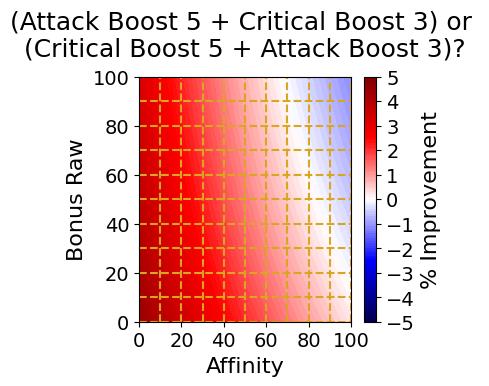

In [ ]:

# Make the main figure
plt.figure(figsize=(4,4))
levels = np.arange(-5, 5.1, 0.1)
contour = plt.contourf(affinity, additional_raw, diff, cmap= 'seismic', levels=levels)

# Set the axis labels
plt.xlabel('Affinity', size=16)
plt.xticks(size=14)
plt.ylabel('Bonus Raw', size=16)
plt.yticks(size=14)
plt.title("(Attack Boost 5 + Critical Boost 3) or \n(Critical Boost 5 + Attack Boost 3)?", size=18, y=1.05)

# Set the colorbar on the right
cbar = plt.colorbar(contour)
cbar.set_ticks(np.arange(-5, 6, 1))  # Set ticks at multiples of 1
cbar.set_label("% Improvement", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Draw some horizontal lines to make it easier for the person to see
for i in range (11):
    plt.plot([0,100],[i*10,i*10], color='goldenrod', linestyle='dashed')
    plt.plot([i*10,i*10], [0,100],color='goldenrod', linestyle='dashed')

# Save the figure
plt.tight_layout()
plt.savefig('DamageComparison.png', dpi=180)